# Análise Descritiva 3 - parte 1

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [9]:
# Importando bibliotecas 

import pandas as pd
import yfinance as yf
import plotly.express as px

In [10]:
# Obtendo dos dados do Banco do Brasil, Sanepar, Taesa

tickers = ['BBAS3.SA', 'SAPR4.SA', 'TAEE11.SA']

data = yf.download(tickers, start = '2020-01-01')
data.to_csv('./output/dados_bolsa.csv')

print(data.shape)
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

(1301, 15)


Price           Close                            High                       \
Ticker       BBAS3.SA  SAPR4.SA  TAEE11.SA   BBAS3.SA  SAPR4.SA  TAEE11.SA   
Date                                                                         
2020-01-02  18.980946  5.057755  19.304089  19.040923  5.193784  19.629579   
2020-01-03  18.949194  4.699138  19.279049  19.019755  5.057756  19.360422   
2020-01-06  18.698702  4.706557  19.397976  18.839825  4.785701  19.535683   
2020-01-07  18.557575  4.817853  19.166382  18.709282  4.817853  19.397980   
2020-01-08  18.388235  4.815379  18.972340  18.695177  4.847531  19.266534   

Price             Low                            Open                       \
Ticker       BBAS3.SA  SAPR4.SA  TAEE11.SA   BBAS3.SA  SAPR4.SA  TAEE11.SA   
Date                                                                         
2020-01-02  18.758678  5.057755  19.266532  18.822183  5.161631  19.498131   
2020-01-03  18.645781  4.699138  19.103786  18.733982  5.033024  19.304087   
2020-01-06  18.504659  4.659566  19.185155  18.839825  4.773335  19.397976   
2020-01-07  18.448206  4.709031  18.997377  18.698698  4.756022  19.397980   
2020-01-08  18.360011  4.748602  18.728222  18.614031  4.822799  19.247755   

Price         Volume                      
Ticker      BBAS3.SA  SAPR4.SA TAEE11.SA  
Date                                      
2020-01-02  26319800   2757300   1270600  
2020-01-03  18930800  26943900    814700  
2020-01-06  19999800  10079100   1723300  
2020-01-07  21277000   3516600   1937800  
2020-01-08  42937200   2796600   1360100

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [12]:
for ticker in tickers:
    data[('amplitude_dia', ticker)] = data[('High', ticker)] - data[('Low', ticker)]

data.head()

Price           Close                            High                       \
Ticker       BBAS3.SA  SAPR4.SA  TAEE11.SA   BBAS3.SA  SAPR4.SA  TAEE11.SA   
Date                                                                         
2020-01-02  18.980946  5.057755  19.304089  19.040923  5.193784  19.629579   
2020-01-03  18.949194  4.699138  19.279049  19.019755  5.057756  19.360422   
2020-01-06  18.698702  4.706557  19.397976  18.839825  4.785701  19.535683   
2020-01-07  18.557575  4.817853  19.166382  18.709282  4.817853  19.397980   
2020-01-08  18.388235  4.815379  18.972340  18.695177  4.847531  19.266534   

Price             Low                            Open                       \
Ticker       BBAS3.SA  SAPR4.SA  TAEE11.SA   BBAS3.SA  SAPR4.SA  TAEE11.SA   
Date                                                                         
2020-01-02  18.758678  5.057755  19.266532  18.822183  5.161631  19.498131   
2020-01-03  18.645781  4.699138  19.103786  18.733982  5.033024  19.304087   
2020-01-06  18.504659  4.659566  19.185155  18.839825  4.773335  19.397976   
2020-01-07  18.448206  4.709031  18.997377  18.698698  4.756022  19.397980   
2020-01-08  18.360011  4.748602  18.728222  18.614031  4.822799  19.247755   

Price         Volume                     amplitude_dia                      
Ticker      BBAS3.SA  SAPR4.SA TAEE11.SA      BBAS3.SA  SAPR4.SA TAEE11.SA  
Date                                                                        
2020-01-02  26319800   2757300   1270600      0.282246  0.136028  0.363047  
2020-01-03  18930800  26943900    814700      0.373975  0.358618  0.256637  
2020-01-06  19999800  10079100   1723300      0.335166  0.126134  0.350528  
2020-01-07  21277000   3516600   1937800      0.261075  0.108822  0.400603  
2020-01-08  42937200   2796600   1360100      0.335166  0.098929  0.538312

In [13]:
# Selecionando dados para visualização

amplitude = data['amplitude_dia'].stack().reset_index()
amplitude.columns = ['data', 'ativo', 'amplitude_variacao']

amplitude.head(6)

,data,ativo,amplitude_variacao
0,2020-01-02,BBAS3.SA,0.282246
1,2020-01-02,SAPR4.SA,0.136028
2,2020-01-02,TAEE11.SA,0.363047
3,2020-01-03,BBAS3.SA,0.373975
4,2020-01-03,SAPR4.SA,0.358618
5,2020-01-03,TAEE11.SA,0.256637


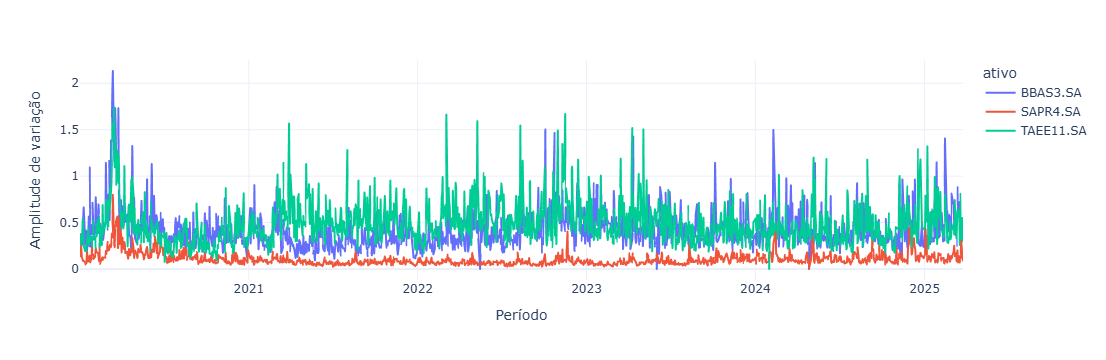

In [127]:
# Gerando gráfico

fig = px.line(amplitude, x='data', y='amplitude_variacao', color='ativo', template='plotly_white')
fig.update_layout(yaxis_title='Amplitude de variação',
                 xaxis_title='Período')
fig.show()

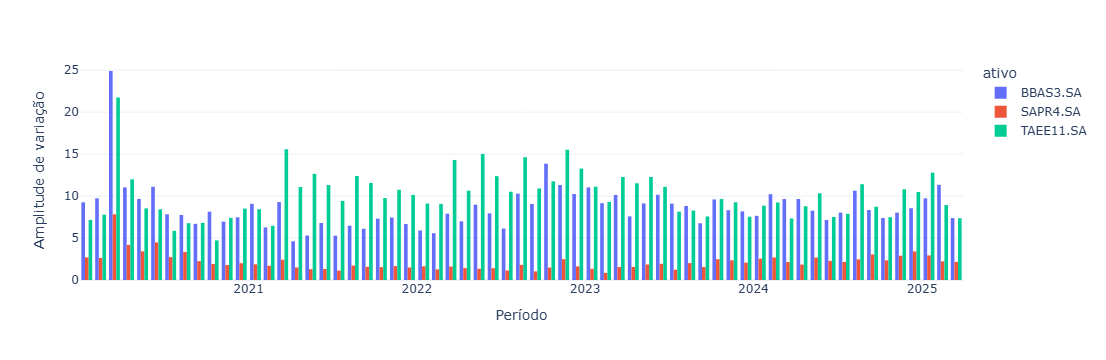

In [69]:
fig = px.histogram(amplitude, x='data', y='amplitude_variacao', color='ativo',
                   barmode='group', nbins=100, template='plotly_white')
fig.update_layout(yaxis_title='Amplitude de variação',
                 xaxis_title='Período')
fig.show()

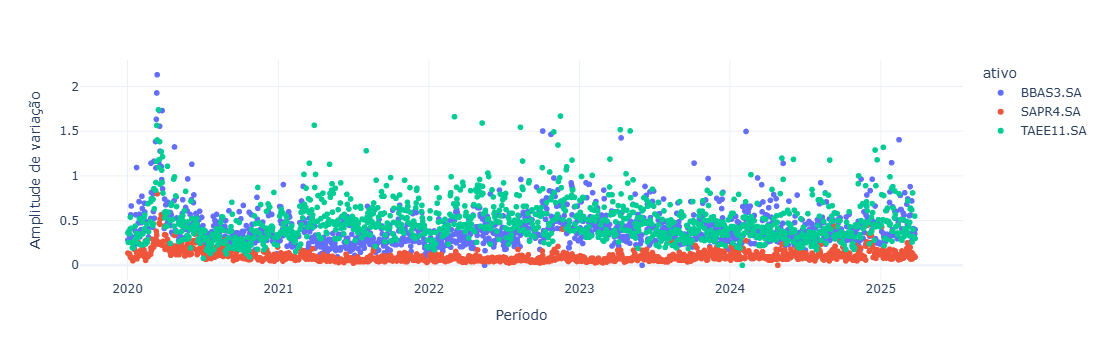

In [67]:
fig = px.scatter(amplitude, x='data', y='amplitude_variacao', color='ativo', template='plotly_white')
fig.update_layout(yaxis_title='Amplitude de variação',
                 xaxis_title='Período')
fig.show()

In [125]:
ativos = ['BBAS3.SA', 'SAPR4.SA', 'TAEE11.SA']

for _ in ativos:
    volat = amplitude[amplitude['ativo'] == _].amplitude_variacao.sum()
    print('--> A amplitude de variação ao longo de todo o período analisado para o ativo {} foi de: {}'.format(_, round(volat,2)))

--> A amplitude de variação ao longo de todo o período analisado para o ativo BBAS3.SA foi de: 545.27
--> A amplitude de variação ao longo de todo o período analisado para o ativo SAPR4.SA foi de: 135.07
--> A amplitude de variação ao longo de todo o período analisado para o ativo TAEE11.SA foi de: 638.28


#### Insights

Obtendo a soma da variação diária do ativo ao longo de todo o período, podemos definir o ativo que teve maior volatilidade. 
- Neste caso o ativo de maior volatilidade foi `TAEE11.SA`. Isso também pode ser visto pelos gráficos, onde é perceptível que a amplitude de variação para o ativo é, na maior parte do tempo, evidentemente maior.
- O segundo ativo de maior volatilidade foi `BBAS3.SA`.
- O ativo menos volátil foi `SAPR4.SA`. Até mesmo nos gráficos não é difícil perceber que esse ativo possui uma variação diária pequena, oscilando poucos seus preços.